# Optical setups for Digital Inline Holography

## Gabor setup (spherical illumination)

Laser $\rightarrow$ [Mirror] $\rightarrow$ [Half-wave plate $\rightarrow$ Polarizer]@532nm $\rightarrow$ Aspherical lens $\rightarrow$ Pinhole $\rightarrow$ Collimating lens $\rightarrow$ Focusing aspherical lens $\rightarrow$ Window 1 $\rightarrow$ Sample $\rightarrow$ Window 2 $\rightarrow$ Camera.

### Mountings

- Laser CryLas FTSS355-Q4 : 4 posts M3
- Mirror : KCB1C/M kinematic right angle mirror mount 1"
- Half-wave plate : rotation mount CRM1/M
- Polarizer : CP08/M ? Plate cage 30 mm
- Aspherical lens : z translation (SM1Z), SM1-MO adaptor (SM1A3), MO-M9 extended adaptor (E09RMS) 
- Pinhole : XY cage stage (ST1XY-S/M)
- Collimating lens : tube and retaining rings
- Focusing aspherical lens : #87984 30 mm cage mount for SP05 optics (CP32/M)
- Window 1 : WG41050-A in LCP02/M adapter to 60 mm cage
- Window 2 : WG42012-A in tube with retaining rings. Tube supported with LCP09
- Camera : SM2int-M52ext M52int-M58ext adapters

Using 30 mm cage system with enclosing tubes (6mm rods).

### Specs

- Laser FTSS355-Q4 355 nm pulsed
- Mirror : Protected silver (450nm-20um), enhanced aluminum (250-450nm) 
- Half-wave plate 532nm
- Polarizer : N-BK7 Windows, 400-700 nm
- Aspherical lens : C230TMD-A 4.51mm (before f=15.29mm, NA=0.16  f = 15.29 mm, ARC: 350 - 700 nm)
- Pinhole : 40 um
- Collimating lens f=40mm N-BK7 350-700 nm
- Focusing aspherical lens UV-VIS 12.5mm dia 12.5mm f 0.5 NA
- Window 1 : 350-700nm 5mm thick
- Window 2 : 350-700nm 12mm thick
- Camera

In [1]:
# The collimating lens placed at a focal distance gives a radius of:
import numpy as np
from matplotlib import pyplot as plt

NA_asph1 = 0.16
f_asph1 = 15.29 # mm
f_coll = 40 # mm
f_asph2 = 12.5 # mm
wavelength = 355e-3 # um
theta = np.arcsin(NA_asph1)
r_coll = np.tan(theta)*f_coll
print("Radius after collimation : {:.2f} mm".format(r_coll))
r_focus = wavelength * f_asph2 / r_coll
print("Radius in focused source : {:.2f} um".format(r_focus))

Radius after collimation : 6.48 mm
Radius in focused source : 0.68 um


## Protections

Camera protection requires that optical power cannot be higher than 1 kW/cm$^2$ CW or 0.1 J/cm$^2$. Laser cases:

- FTS355 : 0.3 mm diameter, 200 $\mu$J.
- GEM532 : 0.5 mm, 1 W

Camera sensor dimensions: 	29.18 x 20.19 mm

In [2]:
# Sensor area
sa = 2.918 * 2.019 # cm2

# Case small beam 355 nm
d355 = .03 # cm
E355 = 200 # uJ
E_small355 = E355 / np.pi / (d355/2)**2 / 1000
print("Energy concentration in small beam for FTS355 : {} mJ/cm2".format(E_small355))
OD_max_suv = 1
atten_E_small355 = E_small355 * 10**(-OD_max_suv)
print("Energy concentration in small beam with NDF OD{} for FTS355 : {} mJ/cm2".format(OD_max_suv, atten_E_small355))

# Case large beam 355 nm
E_large355 = E355 / sa / 1000 # mJ/cm2
print("Energy concentration in whole sensor beam for FTS355 : {} mJ/cm2".format(E_large355))
OD_max_luv = 0
atten_E_large355 = E_large355 * 10**(-OD_max_luv)
print("Energy concentration in whole sensor beam with NDF OD{} for FTS355 : {} mJ/cm2".format(OD_max_luv, atten_E_large355))

# Case small beam 532 nm
d532 = .05 # cm
P532 = 1 # W
P_small532 = P532 / np.pi / (d532/2)**2
print("Power density in small beam for GEM532 : {} W/cm2".format(P_small532))
OD_max_svis = 0.5
atten_P_small532 = P_small532 * 10**(-OD_max_svis)
print("Power density in small beam with NDF OD{} for GEM532 : {} W/cm2".format(OD_max_svis, atten_P_small532))

# Case large beam 532 nm
P_large532 = P532 / sa # W/cm2
print("Power density in whole sensor beam for GEM532 : {} W/cm2".format(P_large532))
OD_max_lvis = 0
atten_P_large532 = P_large532 * 10**(-OD_max_lvis)
print("Power density in whole sensor beam with NDF OD{} for GEM532 : {} W/cm2".format(OD_max_lvis, atten_P_large532))

Energy concentration in small beam for FTS355 : 282.94212105225836 mJ/cm2
Energy concentration in small beam with NDF OD1 for FTS355 : 28.29421210522584 mJ/cm2
Energy concentration in whole sensor beam for FTS355 : 0.03394754628832805 mJ/cm2
Energy concentration in whole sensor beam with NDF OD0 for FTS355 : 0.03394754628832805 mJ/cm2
Power density in small beam for GEM532 : 509.295817894065 W/cm2
Power density in small beam with NDF OD0.5 for GEM532 : 161.0534787343585 W/cm2
Power density in whole sensor beam for GEM532 : 0.16973773144164025 W/cm2
Power density in whole sensor beam with NDF OD0 for GEM532 : 0.16973773144164025 W/cm2


## Timing with nanodispenser

The initial velocity determines how far the drop gets in horizontal axis and the time to reach the field of view. 
$$v_0 = v_{0x} \sin(\phi) \hat{x} + v_{0y} \cos(\phi) \hat{y}$$
$$x(t) = v_{0x} t$$
$$y(t) = v_{0y} t + 5 \frac{\mbox{m}}{\mbox{s}} t^2$$


In [3]:
phi = np.pi/4
v0 = 0.5 # Initial velocity m/s
d = 0.10 # m Distance to impact/field of view from dispenser
d_cm = d * 100
v0x = v0 * np.sin(phi)
v0y = v0 * np.cos(phi)
t = np.roots([5, v0y, -d])
t = np.max(t)
print("The time to go along a distance of {} cm is {} s".format(d_cm, t))
x = v0x * t
x_cm = x * 100
print("The travelled distance in x axis is {} cm.".format(x_cm))
vy_end = v0y + 10 * t
t_1mm = 0.001 / vy_end * 1000 # ms
print("The final velocity in y is {} m/s, so it takes {} ms to travel 1 mm distance.".format(vy_end, t_1mm))

The time to go along a distance of 10.0 cm is 0.11041845831180512 s
The travelled distance in x axis is 3.9038820320220755 cm.
The final velocity in y is 1.457737973711325 m/s, so it takes 0.6859943405700355 ms to travel 1 mm distance.


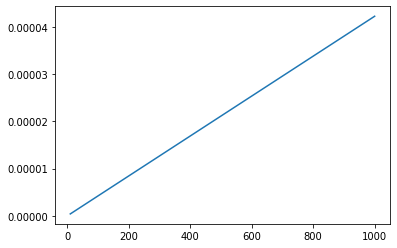

In [4]:
# If I want to scan the YZ plane with the trajectory of the drops, then I need to know different curves of Y displacement for different angles at different Z heights.
Nh, Na = 5, 100
hs = np.linspace(0.04, 0.15, Nh)  # heights in m
angles = np.linspace(0, np.pi/3, Na) # angles of shooting with respect to Y axis
v0xs = v0 * np.sin(angles)
v0ys = v0 * np.cos(angles)
tss = np.zeros((Nh, Na, 2))
for kh in range(Nh):
    for ka in range(Na):
        tss[kh, ka] = np.roots([5, v0ys[ka], -hs[kh]])
tss = tss.max(axis=2)
xs = v0xs * tss
# plt.plot(angles,xs.T)
# plt.ylabel("Distance from departure (m)")
# plt.xlabel("Angle with respect to vertical (rad)")

# Resolution
# What is the resolution in x if the height was fixed and the x displacement is around 2 cm.
resols = np.logspace(1, 3, Na) # urad
phi_ini = 0.7
h_fix = 0.1
v0x_ini = v0 * np.sin(phi_ini)
v0y_ini = v0 * np.cos(phi_ini)
t_ini = np.roots([5, v0y, -h_fix])
t_ini = np.max(t)
x_ini = v0x_ini * t_ini
dxs = np.zeros(Na)
for kr in range(Na):
    phi_end = phi_ini + resols[kr] * 1e-6
    v0x_end = v0 * np.sin(phi_end)
    v0y_end = v0 * np.cos(phi_end)
    t_end = np.roots([5, v0y, -h_fix])
    t_end = np.max(t)
    x_end = v0x_end * t_end
    dxs[kr] = x_end - x_ini
plt.figure
plt.plot(resols, dxs)

## Triggering circuit

The board has several connectors. Starting from the corner with the number 25, there are 2 pin connectors for +5V (1, 2). Then, connector white (W1), 2 pin connectors and a cable for GND (3,4,5). The BNC connector is for sending trigger signals to the laser head of FTS355. Then, 3 pin connectors (6,7,8, starting from the border of the board). Two white connectors W2, W3. So, for using it they have to be connected as:

1. Power source +5V.
2. +5V for powering the NI-6517. Goes to pin 19.
3. Power source GND
4. GND for the NI-6517. Goes to pin 5.
5. GND for oscilloscope probes
6. Trigger signal for camera (frame grabber) P0-L0 from 6517, pin 1.
7. Trigger signal for drop dispenser, P0-L1 from 6517, pin 20.
8. Trigger signal for laser, P0-L2 from 6517, pin 2.
9. W1 : only 5V to frame grabber.
10. W2 : Connector to frame grabber (trigger signal and GND).
11. W3 : Connector to drop dispenser (trigger signal and GND).
12. BNC : Connector to laser control box (trigger signal and GND).

## Mounting static sample

- Focusing aspherical lens : 30 mm cage mount for SP05 optics (CP32/M) : 4 mm
- Window 1 : LCP02/M adapter to 60 mm cage : 13 mm
- Sample : R2L2S3P1 in CYLCP/M : 7 mm + 1 mm sample + 7 mm
- Window 2 : in tube with retaining rings. Tube supported with LCP09 and touching CYLCP/M : 29.2 mm
- Camera : SM2int-M52ext SM2A52 M52int-M58ext 59447 adapters : 4.3 mm + 11.5 mm

Distance from focal point (12.5 mm) to sample : 12 mm

Distance from sample to sensor : 52 mm

### Mounting LED illumination

LEDs:

- LED631E : 20mA : 2.2 V, 4 mW (light), 140 $\Omega$, 44 mW ; 50 mA : 2,6 V, 48 $\Omega$, 130 mW, use 82 $\Omega$
- LED370E : 20 mA : 3.5 V, 2.5 mW (light), 75 $\Omega$, 70 mW ; 30 mA : 4.3 V, 23 $\Omega$, 129 mW, use 51 $\Omega$
- LED375L : 20 mA : 3.6 V, 1 mW (light), 70 $\Omega$, 72 mW ; 30 mA : 4 V, 33 $\Omega$, 120 mW, use 51 $\Omega$

In [2]:
# Power and resistance calculation
V_source = 5  # V
V_led = 4   # V
I_led = 30    # mA
R = (V_source - V_led) / I_led *1000   # ohm
P = V_led * I_led   # mW
print("The resistance is {:.2f} \u2126 and the power in the LED is {:.2f} mW".format(R, P))
ga = np.sqrt(48*140)
print("Geometric average : {}".format(ga))

The resistance is 33.33 Ω and the power in the LED is 120.00 mW


NameError: name 'np' is not defined

## Mounting motorised linear stage in z axis
Using the 30 mm cage system. CP02B 2 rods M4 thru holes, 8-32 screw nuts and MSA8, with 4-40 screwset to rod (socket set). In the lower CP03B one of the nuts is replaced by a AS8E4M to attach to a post with base (attached to the table). 2 6" rods go straight to a CPMA2/M attached to a post with an M4 cap screw. 3 ER90B/M attach a rod to the linear stage with an M3 screw, and a 4th one is used to lock movement on the other rod.

Requiring M3 screws (3 mm + 2.5 mm? = 5 mm or 6?), M4 screws 10,12,16,20.

# Experiments

## Freezing levitated droplet

### Description

An acoustic levitator is used for keeping one or more floating droplets in the air while a high speed camera gets images (holograms) of them freezing inside a cold room with decreasing temperature. The camera acquires images continuously with single laser pulses occurring at the time when the exposure is ON. The acquisition stops after the freezing event occurs. Ideally, this time is detected automatically. First experiments will be useful for determining the features that may be used to detect the freezing event.

### Measuring system

An enclosed inline holographic system is used. The door must be closed in order to turn on the laser and heaters after the alignment is completed (closed door detector). The alignment can be done before taking the equipment to the cold room, the laser can be turned on with the door opened when set to alignment mode (key switched). 

The temperature in the cold room can go from 0°C to -30°C. The temperature inside the enclosure cannot go below 0°C. A 30 W (220V) heater is used for raising the temperature inside the enclosure. A microcontroller (MCU) based board is used to turn the heater on when the temperature is dropping below 2°C. The temperature of the laser (covered by thermal insulator) is also controlled by a 5W heater as it must not go below 18°C. The temperatures of the MCU, the air inside of the enclosure and the laser are measured and informed by the MCU via USB (USART).

The PC outside the room controls:
- acquisition of camera (Euresys CoaxlinkQuadG3)
- Laser trigger (Euresys CoaxlinkQuadG3)
- ON/OFF laser (USB)
- KASA Power strip (smartphone or online) -> acoustic levitator
- configuration of Nucleo SMT32

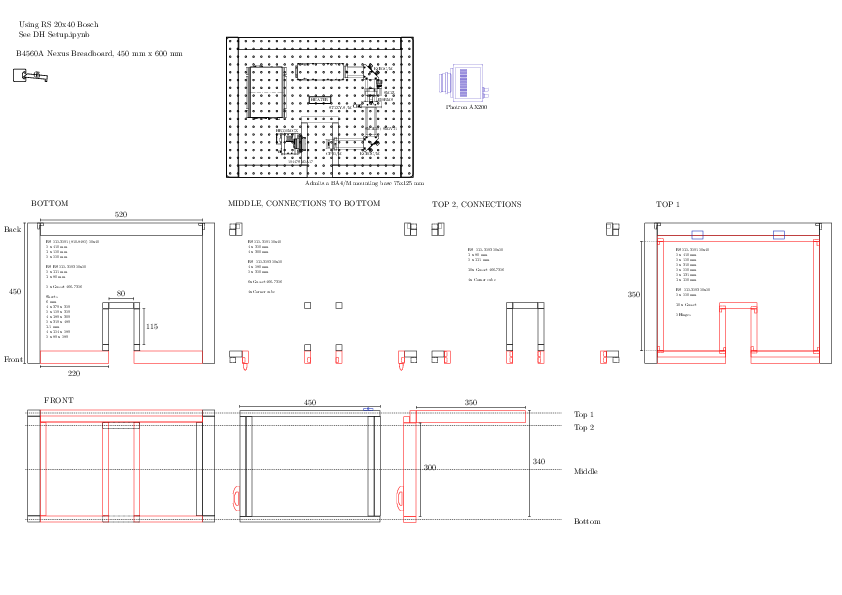

In [1]:
from wand.image import Image as WImage
img = WImage(filename='./Files/Design_20x40_strut.pdf')
img

## Enclosure for cold room

See files in 'C:\Users\j05625pe\Documents\Work\Equipment\Cold chamber enclosure'

### Support and enclosure

**How does it works with the Physics Workshop? Do I buy the materials and they cut it? (strut profiles and plastic sheets)**

[Nexus Breadboard](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=7154&pn=B4560A#7157), 450 mm x 600 mm x 60 mm, 28 kg

Other weights:
- Laser + OEM-IL : ?
- Mirror mount : 0.2 kg
- Z axis : 0.2 kg
- XY : 0.25 kg
- Collimating : 0.15 kg
- Focusing : 0.1 kg
- Window 1 : 0.1 kg
- Window 2 : 0.1 kg
- Camera : 2 kg
- Posts (post, holder, foot) x10 (0.1, 0.075, 0.025 = 0.2) = 2 kg

Total : < 40 kg
- 4 [AV5/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6421&pn=AV5/M) supports : up to 60 kg.

Volume@30mm height : $0.45 * .6 * .3 \mbox{m}^3 = 0.1 \mbox{m}^3$ 

Plastic sheets of enclosure (double glazed, rails with 2 grooves):
- [PVC 0.19  Grey Plastic Sheet](https://uk.rs-online.com/web/p/plastic-sheets/7048204/?sra=pstk), 1000mm x 1000mm x 6mm RS Stock No.: 704-8204 £51.27

Plastic sheets of sample volume (thinner for easy adaptation of optomechanics, double glazed in single groove):
- RS 748-1305 [Black, White Plastic Sheet](https://uk.rs-online.com/web/p/plastic-sheets/7481305/?sra=pstk), 1300mm x 500mm x 1.5mm RS PRO £64.44

The double sheet of 1.5 mm goes in 6mm groove with a strip in between:
- RS 170-6147 [TE Connectivity Polyolefin Black Edging strip](https://uk.rs-online.com/web/p/door-seals/1706147/?sra=pstk), 1.2m x 6 mm x 3.4mm £2.66

Clamping to table:	
- NOT XE25CL2 Table Clamp for 25 mm Rails £9.41
- [Thorlabs CL6](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=191&pn=CL6) Table Clamp, RLA Series Optical Rails £4.79

Construction rails and structure: 
- 212-3293 Bosch Rexroth strut [20x20](https://uk.rs-online.com/web/p/tubing-and-profile-struts/2123293/?sra=pstk) groove 6mm 2m length (5 mm depth)
- 212-3295 Bosch Rexroth strut [20x40](https://uk.rs-online.com/web/p/tubing-and-profile-struts/2123295/?sra=pstk) groove 6mm 2m length
- Possible angle Connection 523-376 466-7354 200-7286 (requires cutting a shape in corners of sheets)
- [Gusset](https://uk.rs-online.com/web/p/connecting-components/4667326/?sra=pstk) 466-7326 Bosch Rexroth Strut Profile Gusset, strut profile 20 mm, Groove Size 6mm x10 £11.76 (complete sheets)
- [Bosch Rexroth Corner Cube Kit](https://uk.rs-online.com/web/p/connecting-components/4667433/?sra=pstk), 20 mm, Groove Size 6mm RS 466-7433 £6.18 (easier for 20x20 rails)
- [T-slot nut](https://uk.rs-online.com/web/p/connecting-components/4667281/?sra=pstk) 466-7281
- 2 [Hinges](https://uk.rs-online.com/web/p/door-components/3902123/?sra=pstk) 390-2123
- Rim -> 4mm 227-674
- 2 [Handle](https://uk.rs-online.com/web/p/door-components/4667461/?sra=pstk) 466-7461 M6
- Screws S6 x10 [RS 466-7304](https://uk.rs-online.com/web/p/connecting-components/4667304/?sra=pstk) £4.03 10
- 2 [Thorlabs XE25LS](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6751&pn=XE25LS) Lid Stop for 25 mm Rail Enclosures £5.89
- 3 [RS 231-964](https://uk.rs-online.com/web/p/ptfe-tapes/0231964/?sra=pstk) Sealant tape 0.2 mm 5m £1.32
- Sealant cover strip for closing the gap between the door and the frame (reduce lengths of rails?) [RS Stock No.466-7499](https://uk.rs-online.com/web/p/cover-strips/4667499/)) 2m 2 required £5.91

RS 212-3295 (850-8482) 20x40 : 5 x 2m
- 3 x 520 mm
- 4 x 450 mm
- 2 x 350 mm
- 4 x 320 mm
- 4 x 300 mm
- 4 x 220 mm
- 2 x 135 mm
- 1 x 120 mm

RS RS 212-3293 20x20 : 2 x 2m
- 2 x 320 mm
- 4 x 280 mm
- 2 x 220 mm
- 4 x 115 mm
- 2 x 80 mm

- 10 x Angles (| RS | 200-7286 | ANGLE BRACKET 20X20 | £1.18 | 10 | Already Available)
- 40 x Gussets
- 8 x Corner cubes

### Additional optomechanics

Jonny's meeting: Make room for bigger camera. Symmetric enclosure.

[Thorlabs KCB1C/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=6813&pn=KCB1C/M#8309) Right-Angle Kinematic Mirror Mount with Smooth Cage Rod Bores, 30 mm Cage System and SM1 Compatible £110.47

### Windows

Source side:
- [CP32/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2273&pn=CP32/M#6683) 30mm cage system, SM05 optic mount. Already available.
- [SM1A1 Adapter](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1524&pn=SM1A1#3235) with External SM05 Threads and Internal SM1 Threads £16.40

Camera side:
- [Thorlabs SM1.5L03](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=12871&pn=SM1.5L03#13042) SM1.5 Lens Tube, 0.30" Thread Depth, One Retaining Ring Included £22.89
- [Thorlabs SM2A57](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=4956&pn=SM2A57#7358) Adapter with External SM2 Threads and Internal SM1.5 Threads
- [Thorlabs SM2A55](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=4956&pn=SM2A55#7362) Adapter with External C-Mount Threads and External SM2 Threads (Optronis and Photron, already available)

Not necessary:
- | Thorlabs | SM1A69 | Adapter with External SM1 Threads and Internal SM1.5 Threads | £18.16 | 1 |

### Operational temperatures and humidity

- Laser FTS355 : 18 - 35 °C (40W)
- Camera Optronis : 0 - 40 °C, humidity <80%	(10W)
- Camera SVS Vistek : -10 - 55 °C, humidity 10-90%(14W)
- Camera Photron : 0 - 40 °C , humidity <85%	(50W)
- Linear stage : 0 - 50 °C

### Electronics

[Nucleo STM32F091RC](https://www.st.com/en/evaluation-tools/nucleo-f091rc.html). 32 bit MCU, Timers, ADC, SPI, I2C.  7 cm x 8 cm
- Main interlock door closed (deactivates laser and heater)
- Alignment mode key switch (deactivates heater)
- LED panel control
- temperature measurements
- heating control (laser and inside enclosure)
- USART with virtual COM to PC

DIN rail support (6.3 mm holes, 7.5 mm height):
- Wago, 260, 261, 262 Mounting Adapter for Terminal Block [RS 101-3877](https://uk.rs-online.com/web/p/din-rail-terminal-accessories/1013877/)
- Richco 469.09.20, 20mm High Polyamide Round Spacer, 6 mm outer diameter [RS 102-6160](https://uk.rs-online.com/web/p/round-spacers/1026160/) with M4
- HS 6 6, 19.1mm High CPVC Hex Spacer 6.4mm Wide, With 2.8mm Bore Diameter for M3, No.6 Screw [RS 265-2388](https://uk.rs-online.com/web/p/hex-spacers/2652388/)
- SOLVED WITH [THORLABS TR20/M](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=1266&pn=TR20/M)
- It could also go attached to a panel : 11mm High Polyamide Round Spacer [RS 184-2369](https://uk.rs-online.com/web/p/round-spacers/1842369/) x50 £8.75

### Moisture

Desiccant: silica gel
For a well sealed enclosure:
- 170 grams per cubic metre of volume

20 g should be enough. [100 sachet 10g](https://www.rapidonline.com/antistat-309-0081-silica-gel-desiccant-sachet-10g-non-indicating-40-x-75mm-100-87-9922) : Rapid Electronics Ltd 87-9922

thermo hygrometer?

### Temperature

Thermal conductivity k = Q d/ A/(T2-T1) <br />
PETG 0.19 W/mK <br />
PMMA 0.19 W/mK <br />
PC 0.22 W/mK <br />
T2 = 2°C <br />
T1 = -30°C <br />
A = 1 m2 <br />
Q = 420 W <br />
d = 6 mm <br />
More details in Python below.

#### Heaters and T measurements

- NOT NECESSARY: Enclosure Heater, 100W. Supplier: RS Components. Cat no: 759-4820 Manufacturer part number: Nimbus D175, 370184,01
- [Enclosure Heater, 30W](https://uk.rs-online.com/web/p/enclosure-heaters/7594814/?sra=pstk) RS 759-4814 Nimbus D65, 370177,01 DBK Enclosures £17.57

**Concerns about heater? LED letting know that it's hot**

Not necessary (double glazed everywhere):
- | RS | 759-4820 | Enclosure Heater, 100W | £29.57 | 1 |

Slotted DIN rail 35 mm EN50 022 [RS 899-0917](https://uk.rs-online.com/web/p/din-rails/8990917/?sra=pstk)

Fuse 6.3 A (for 100W heater):
- Rapid Electronics 66-0464 Fuse holder : fuses UL Class cC and midget fuses, and IEC 10x38 fuses
- RS 188-1613 Fuse holder : 10X38MM FUSES : Cartridge Fuse 188-7044 6A 
- [RS 501-871](https://uk.rs-online.com/web/p/rail-mount-fuse-holders/0501871/?sra=pstk) Fuse holder : 5x20 fuses : 563-706 cartridge fuse 6.3A

Fuse 4A (30W heater):
- [RS 668-5972](https://uk.rs-online.com/web/p/cartridge-fuses/6685972/?sra=pstk) RS PRO, 4A Glass Cartridge Fuse, 5 x 20mm, Speed F

Laser at 20°C:

Dimensions 147 mm x 54 mm x 39 mm

Bended insulator (envelope shape): Flame Retardant Calcium-Magnesium Silicate Thermal Insulation, 2.8m x 610mm x 2mm [RS 724-8906](https://uk.rs-online.com/web/p/thermal-insulation/7248906/?sra=pstk) £44.92

Thermal insulation PAI 0.27 W/mK 3mm, 6mm

Consider heater : RS PRO Silicone Heater Mat, 5 W, 50 x 100mm, 12 V dc [RS 245-528](https://uk.rs-online.com/web/p/heater-pads/0245528/?sra=pstk)

##### Thermocouples:
- PFA or PTFE housing
- Class 3, Type T (accuracy 1.5°C), K, N, E (accuracy 2.5°C). -200°C to 40°C
- Cable length up to 100 Ohms
- Measurement of out temperatures outside and inside of the enclosure and temperature of laser.
- RS PRO Type K Thermocouple 1m Length, 2mm Diameter → +250°C x5 £14.12 [RS 621-2158](https://uk.rs-online.com/web/p/thermocouples/6212158/)

Thermocouple to digital output boards:
- Seeed Studio, Grove - I2C Thermocouple Amplifier I2C Module, MCP9600 for K-Type Thermocouple - [RS 188-7107](https://uk.rs-online.com/web/p/sensor-development-tools/1887107/?sra=pstk) £11.51
- Maxim MAX31855PMB1#, Peripheral Module Thermocouple Sensor Development Board RS 191-4223 £14.32

Thermocouple to analog:
- Seeed Studio, 1-Wire Thermocouple Amplifier Module, MAX31850K - [RS 188-7118](https://uk.rs-online.com/web/p/sensor-development-tools/1887118/?sra=pstk) £8.39 (thermocouple cable)
- Adafruit 1778 Analog Output K-Type Thermocouple Amplifier - AD8495 Rapid Electronics Ltd 73-5399 £12.28 (thermocouple cable)


### Cables

**Concerns about power line management? Safety issues.**

Main for the heater, and probably the laser controller:
- Schurter C14 Panel Mount IEC Connector Male, 10A, 250 V, Fuse Size 5 x 20mm [RS 867-7184](https://uk.rs-online.com/web/p/iec-connectors/8677184/) £5.19

Ring terminal for grounding?

Cables from the PC to the enclosure should be 2m long.

Required cables:
- USB for Nucleo STM32 : NEED TO BUY one 2 m long
- Camera COAXPRESS : 13 mm (5 m)
- Laser trigger COAX : 5 mm (2 m) NEED TO BUY connection between Frame Grabber and coax.
- Laser USB Control : 3 mm (2 m)
- Laser PWR (1.6A) (Or just head cable for laser? Too short) 7 mm (2 m) - 5.2 mm (1 m) - 9.3 mm (0.5 m)
- Heater PWR 220V
- Acoustic levitator : 2.5 mm (1.5 m)

[Rubber grommets](https://uk.rs-online.com/web/c/cables-wires/cable-glands-strain-relief-grommets/rubber-grommets/) (or glands) at the bottom of panels: MAXIMUM PANEL THICKNESS is 2.5 mm. NOT ENOUGH. 
- 2 USBs, CoaXPRESS, Coax, 4x20AWG

LASER CONTROLLER AND PS INSIDE:
- UK Mains Sockets, 13A, DIN Rail, 250 V ac RS 201-5198 £10.15 : *Better to use IEC power cable unterminated connected to DIN rail terminals*
- Main Circuit Breaker Siemens SENTRON 16 A MCB, 1P Curve B [RS 189-3188](https://uk.rs-online.com/web/p/mcbs/1893188/?sra=pstk) £2.43 NOT NECESSARY IF USING IEC Connector with switch.

DIN rail terminals:
- DIN rail terminal block (feed through - 3), Clamp Termination [RS 826-3057](https://uk.rs-online.com/web/p/din-rail-terminal-blocks/8263057/?sra=pstk) x10 £4.87
- RS PRO, 800 V Din Rail Terminal, Screw Termination x10 [RS 878-7503](https://uk.rs-online.com/web/p/din-rail-terminal-blocks/8787503/)
- End Bracket for use with CDK, CDU, CPE, CTR [RS 878-7553](https://uk.rs-online.com/web/p/terminal-block-accessories/8787553/?sra=pstk)
- End Plate for use with CDU [RS 878-7544](https://uk.rs-online.com/web/p/terminal-block-accessories/8787544/?sra=pstk)

[RS 767-5878](https://uk.rs-online.com/web/p/cable-management-components/7675878/?sra=pstk) Cable manager, 6mm Groove x10 £4.46

### Interlock

Switch detector to GPI of Nucleo STM32:
- Door Interlock Micro Switch Plunger, SPDT 10 A Thermoplastic Polyester, -40 → +85°C [RS 868-1727](https://uk.rs-online.com/web/p/door-interlock-microswitches/8681727/?sra=pstk) £5.35
- SKT Safety Interlock Switch, Fibreglass, 1NC/1NO [RS 410-7212](https://uk.rs-online.com/web/p/safety-rated-interlock-switches/4107212/)

**Recommendation?**

Seeed Studio, Relay Shield V3.0 [RS 174-3234](https://uk.rs-online.com/web/p/shields-for-arduino/1743234/?sra=pstk) £15.25

Alignment mode : Keylock Switch, Single Pole Double Throw (SPDT), 4 A 2-Way [RS 125-8228](https://uk.rs-online.com/web/p/key-switches/1258228/) £10.46 Side panel mounted.

### Panel lights

- RS PRO Green Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 207-731](https://uk.rs-online.com/web/p/indicators/0207731/) £1.62
- RS PRO Yellow Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 207-747](https://uk.rs-online.com/web/p/indicators/0207747/) £1.62
- RS PRO Red Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination [RS 208-201](https://uk.rs-online.com/web/p/indicators/0208201/) £1.76

Resistance 100 Ohm, 1/4 W

### Protections of sample volume

Rubber curtain with magnetic catches:
- RS PRO, Magnetic Catch, 30, 40 6mm Slot [RS 767-5765](https://uk.rs-online.com/web/p/door-components/7675765/) £4.01 x6
- Black Rubber Sheet, 1m x 2m x 1.5mm [RS 733-6731](https://uk.rs-online.com/web/p/rubber-sheets/7336731/) £9.60

### Shopping List

| Supplier | Model | Item description | Price | Amount |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Thorlabs | B4560A	| Nexus Breadboard, 450 mm x 600 mm x 60 mm, M6 x 1.0 Mounting Holes | £633.86 | 1 |
| Thorlabs | AV5/M	| Ø38.1 mm Sorbothane Feet, Internal M6 Mounting Thread, 4 Pieces | £21.71 | 1 |
| Thorlabs | XE25LS	| Lid Stop for 25 mm Rail Enclosures | £5.89 | 2 |
| Thorlabs | CL6 | Table Clamp, RLA Series Optical Rails | £4.79 | 10 |
| Thorlabs | SM2A57 | Adapter with External SM2 Threads and Internal SM1.5 Threads | £18.54 | 1 |
| Thorlabs | SM1.5L03 | SM1.5 Lens Tube, 0.30" Thread Depth, One Retaining Ring Included | £22.89 | 1 |
| Thorlabs | SM1A1 | Adapter with External SM05 Threads and Internal SM1 Threads | £16.40 | 1 |
| Thorlabs | KCB1C/M | Right-Angle Kinematic Mirror Mount, 30 mm Cage System | £110.47 | 1 |
| RS | 212-3293 | Bosch Rexroth strut 20x20 groove 6mm 2m length | £20.94 | 2 |
| RS | 212-3295 | Bosch Rexroth strut 20x40 groove 6mm 2m length | £35.17 | 5 |
| RS | 466-7281 | T-slot nut M4 groove 6 x10 | £5.59 | 10 |
| RS | 466-7304 | Screws S6 x10 | £4.03 | 10|
| RS | 390-2123 | Hinges | £7.04 | 2 |
| RS | 231-964 | Sealant tape 0.2 mm 5m | £1.32 | 3 |
| RS | 170-6147 | TE Connectivity Polyolefin Black Edging strip, 1.2m x 6 mm x 3.4mm | £2.66 | 3 |
| RS | 390-2094 | Door handle | £2.80 | 2 |
| RS | 466-7326 | Bosch Rexroth Strut Profile Gusset, 20 mm, Groove 6mm x10 | £11.76 | 4 |
| RS | 466-7433 | Bosch Rexroth Corner Cube Kit, 20 mm, Groove Size 6mm | £6.18 | 8 |
| Rapid Electronics | 87-9922 | Silica Gel Desiccant Sachet 10g 100 | £13.74 | 1 |
| RS | 704-8204 | Grey PVC Sheet, 1000mm x 1000mm x 6mm | £45.12 | 1 |
| RS | 748-1305 | Black, White Plastic Sheet, 1300mm x 500mm x 1.5mm RS PRO | £64.44 | 1 |
| RS | 759-4814 | Enclosure Heater, 30W Nimbus D65, 370177,01 DBK Enclosures | £17.57 | 1 |
| RS | 899-0917 | DIN Rail | £2.42 | 1 |
| RS | 501-871 | RS PRO Rail Mount Fuse Holder | £7.12 | 1 |
| RS | 668-5972 | RS PRO, 4A Glass Cartridge Fuse, 5 x 20mm, Speed F x10 | £1.35 | 1 |
| RS | 767-5878 | Cable manager, 6mm Groove x10 | £4.46 | 1 |
| RS | 868-1727 | Door Interlock Micro Switch Plunger, SPDT 10 A Thermoplastic Polyester, -40 → +85°C | £5.35 | 1 |
| RS | 724-8906 | Flame Retardant Calcium-Magnesium Silicate Thermal Insulation, 2.8m x 610mm x 2mm | £44.92 | 1 |
| RS | 245-528 | Silicone Heater Mat, 5 W, 50 x 100mm, 12 V dc | £18.51 | 1 |
| RS | 621-2158 | RS PRO Type K Thermocouple 1m Length, 2mm Diameter x5 | £14.12 | 1 |
| RS | 188-7118 | Seeed Studio, 1-Wire Thermocouple Amplifier Module MAX31850K | £8.39 | 2 |
| RS | 867-7184 | Schurter C14 Panel Mount IEC Connector Male, 10A, 250 V, Fuse Size 5 x 20mm | £5.19 | 1 |
| RS | 767-5878 | Cable manager, 6mm Groove x10 | £4.46 | 1 |
| RS | 878-7503 | RS PRO, 800 V Din Rail Terminal, Screw Termination x10 | £2.36 | 1 |
| RS | 878-7553 | End Bracket for use with CDK, CDU, CPE, CTR x5 | £2.16 | 1 |
| RS | 878-7544 | End Plate for use with CDU x5 | £0.95 | 1 |
| RS | 174-3234 | Seeed Studio, Relay Shield V3.0 | £15.25 | 1 |
| RS | 125-8228 | Keylock Switch, Single Pole Double Throw (SPDT), 4 A 2-Way | £10.46 | 1 |
| RS | 207-731 | RS PRO Green Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.62 | 1 |
| RS | 207-747 | RS PRO Yellow Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.62 | 1 |
| RS | 208-201 | RS PRO Red Indicator, 2 V dc, 8mm Mounting Hole Size, Lead Wires Termination | £1.76 | 1 |

In [2]:
# Silica gel
height = 300e-3
width = 600e-3
depth = 450e-3
volume = height * width * depth
print('The maximum possible volume inside the enclosure is {:.2f} m3'.format(volume))

# Temperature
area_side = height*(2*width + 2*depth)
area_top = width*depth
area = height*(2*width + 2*depth) + width*depth
print('The area of dissipation is around {:.2f} m2'.format(area))
T2 = 2
T1 = -30
d = 4e-3
k_plastic = 0.2
Rp_1 = d/(k_plastic*area)
Q = (T2-T1) / Rp_1
print('The maximum dissipated power inside the enclosure should be {:.2f} W. Laser and camera dissipate around 50 W.'.format(Q))
# print('If using RS PRO Strut, 20 x 40 mm, 5mm Groove , 1000mm Length (850-8482) : ')
print('If using Bosch Strut, 20 x 40 mm, 6mm Groove : ')
k_air = 24e-3
dp = 6e-3
da = (40e-3 - 2*6e-3)/2  # 4.3 mm in RS PRO 20x20 rails
Rp = dp/(k_plastic*area)
Ra = da/(k_air*area)
Q_20x40 = (T2-T1)/(2*Rp+Ra)
print('Maximum power required : {:.2f} W'.format(Q_20x40))
R_side = 2*dp/(k_plastic*area_side) + da/(k_air*area_side)
R_top = dp/(k_plastic*area_top)
R_paral = R_side * R_top / (R_side + R_top)
Q_top20 = (T2-T1)/R_paral
print('The power in the case that the top is single layered: {:.2f} W'.format(Q_top20))

Q_equip = 50
T_in = Q_equip*(2*Rp+Ra) - 0
print('In case the temperature outside is 0 °C, the temperature inside will go up to: {:.2f} °C.'.format(T_in))

# Detail of sample volume
strut = 20e-3
fronts = 180e-3
depth = 370e-3
width = 520e-3
sample_depth = 135e-3
sample_width = 80e-3
T_max_out = 0
area_side_double = height * (2*depth + width + 2*fronts)
area_top_double = (depth - strut)*(width-2*strut) - ((sample_depth+strut) * (sample_width+2*strut))
area_sample_double = (2 * sample_depth + sample_width) * (height - strut)
R_side_double = 2*dp/(k_plastic*area_side_double) + da/(k_air*area_side_double)
R_top_double = 2*dp/(k_plastic*area_top_double) + da/(k_air*area_top_double)
R_sample_double = 2*dp/(k_plastic * area_sample_double) + da/(k_air * area_sample_double)
R_total = 1/(R_side_double**(-1) + R_top_double**(-1) + R_sample_double**(-1))
print('*** \nConsidering now the area in more detail : area_double : {:.2f} m2, area_sample : {:.2f} m2.'.format(area_side_double+area_top_double, area_sample_double))
print('Resistances : R_side = {:.2f}, R_top = {:.2f}, R_sample = {:.2f}'.format(R_side_double,R_top_double,R_sample_double))
Q_area_detail = (T2-T1)/R_total
print('Required dissipated power in case of Temp_out = {:.1f}°C, Temp_in = {:.1f}°C : {:.2f} W.'.format(T1,T2,Q_area_detail))
T_in_detail = Q_equip*R_total - T_max_out
print('In case the temperature outside is {:.1f}°C, the temperature inside will go up to: {:.2f} °C when the dissipated power is {:.1f}.'.format(T_max_out,T_in_detail,Q_equip))

# Laser insulation and heating
# Nomex 0.25mm 0.15 W/mK is not enough
d_insul = 2e-3
k_insul = 0.05
h_laser = 39e-3
w_laser = 54e-3
l_laser = 147e-3
T_laser_desired = 20
area_insul = 1.1 * (2*(h_laser+w_laser)*l_laser + 2*h_laser*w_laser)
Q_laser = 20
T_out = 2
R_laser = d_insul/k_insul/area_insul
T_laser = Q_laser*R_laser + T_out
print('*** LASER ***\nTemperature of laser when Temp in enclosure is {:.1f} : {:.2f}°C'.format(T_out,T_laser))
Q_heat_laser = (T_laser_desired - T_out)/R_laser - Q_laser
print('The required power to bring the laser to {:.1f}°C is {:.2f} W.'.format(T_laser_desired, Q_heat_laser))

# LED resistances
Vdd = 3.3
Iled = 10e-3
Vled = 2
R = (Vdd-Vled)/Iled
P = Iled**2 * R
print('***\nRequired resistance is', R, 'with power', P)

# Perimeter of door (sealant strip)
sides_door = 350+400
top_door = 520+520+110*2
bottom_door = 520
perimeter = sides_door + bottom_door + top_door
print("***\nDoor perimeter =", perimeter, "mm")

The maximum possible volume inside the enclosure is 0.08 m3
The area of dissipation is around 0.90 m2
The maximum dissipated power inside the enclosure should be 1440.00 W. Laser and camera dissipate around 50 W.
If using Bosch Strut, 20 x 40 mm, 6mm Groove : 
Maximum power required : 44.77 W
The power in the case that the top is single layered: 319.34 W
In case the temperature outside is 0 °C, the temperature inside will go up to: 35.74 °C.
*** 
Considering now the area in more detail : area_double : 0.64 m2, area_sample : 0.10 m2.
Resistances : R_side = 1.32, R_top = 4.31, R_sample = 6.56
Required dissipated power in case of Temp_out = -30.0°C, Temp_in = 2.0°C : 36.48 W.
In case the temperature outside is 0.0°C, the temperature inside will go up to: 43.86 °C when the dissipated power is 50.0.
*** LASER ***
Temperature of laser when Temp in enclosure is 2.0 : 25.05°C
The required power to bring the laser to 20.0°C is -4.38 W.
***
Required resistance is 129.99999999999997 with power 0.